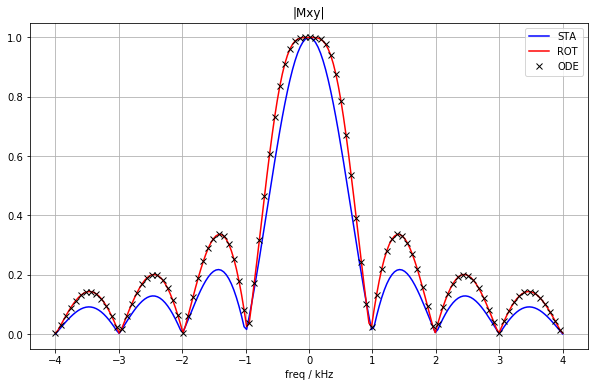

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

"""
off-resonance exictation: 1 ms hard-pulse (b1 field on x-axis, no relaxation)
"""
import numpy as np
from scipy.integrate import odeint  #integrate ODEs 

F      = np.linspace(-2*np.pi*4,2*np.pi*4,200)  # offset frequencies [rad/ms]
w      = np.pi/2                                # tip-angle [rad] 

# STA SOLUTION
M_STA = np.abs(np.sin(w)*np.sinc(F/(2*np.pi)))

M_ODE = np.zeros(F.size); M_ROT = np.zeros(F.size)  #intialize result vectors  
for i, freq in enumerate(F, start=0):
    # ODE SOLUTION
    def bloch(M,t,v,freq): return [ freq*M[1], -freq*M[0]+w*M[2], -w*M[1]]
    M = odeint(bloch, [0.,0.,1.], [0.,1.],(w,freq)) # integrate ODE
    M_ODE[i]=np.sqrt(M[-1,0]**2+M[-1,1]**2)         # transv. magn. 
    # ROTATION MATRIX SOLUTION
    W = -np.sqrt(w**2+freq**2)                    # effective field rotation angle 
    n = (1/np.abs(W)) * np.array([w, 0, freq])    # effective field rotation axis
    a = np.cos(W/2)-1j*n[2]*np.sin(W/2)           # Cayley-Klein parameter alpha             
    b = (-1j*n[0]+n[1])*np.sin(W/2)               # Cayley-Klein parameter beta 
    M_ROT[i]=np.abs(2*np.conj(a)*b)               # transv. magn. 

    
"""
plot results
"""
F = F/(2*np.pi)
plt.figure(figsize=(10, 6))
plt.plot(F     , M_STA         , "b" ,    label="STA")
plt.plot(F     , np.abs(M_ROT) , "r" ,  label="ROT")
plt.plot(F[::2], M_ODE[::2]    , "kx",    label="ODE")
plt.xlabel("freq / kHz"); plt.title("|Mxy|"); plt.legend(loc='upper right')
plt.grid(True); plt.show()


